# Vector data in Python
## Lesson 7: https://carpentries-incubator.github.io/geospatial-python/07-vector-data-in-python/index.html

Questions
How can I read, inspect, and process spatial objects, such as points, lines, and polygons?

Objectives
Load spatial objects.

Select the spatial objects within a bounding box.

Perform a CRS conversion of spatial objects.

Select features of spatial objects.

Match objects in two datasets based on their spatial relationships.

In [1]:
import geopandas as gpd #pandas for geospatial stuff

In [6]:
#Load the fields geodata frame which is a geopackage gpkg
fields = gpd.read_file("../data/brpgewaspercelen_definitief_2020_small.gpkg")  

In [7]:
fields #these are shapely geometries

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [9]:
xmin, xmax = (110_000,140_000)  #110_000 means 110000 with underscore equivalent to commas
ymin,ymax  = (470_000,510_000)
bbox = (xmin,ymin,xmax,ymax)

In [10]:
bbox

(110000, 470000, 140000, 510000)

In [12]:
fields = gpd.read_file("../data/brpgewaspercelen_definitief_2020_small.gpkg",bbox = bbox)

<Axes: >

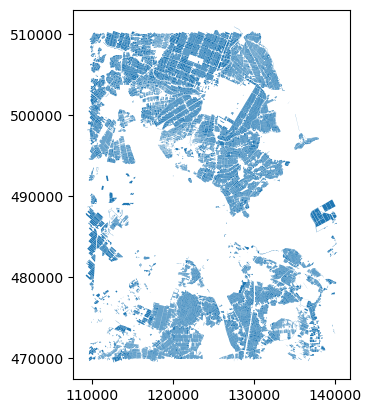

In [13]:
fields.plot()  #agricultural fields

In [14]:
fields.type #shows the type of geometry in the geometry column

0        Polygon
1        Polygon
2        Polygon
3        Polygon
4        Polygon
          ...   
22026    Polygon
22027    Polygon
22028    Polygon
22029    Polygon
22030    Polygon
Length: 22031, dtype: object

In [15]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [16]:
fields.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

## Let's chop down the data a little further

In [20]:
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)

fields_cx = fields.cx[xmin:xmax, ymin:ymax] #index, cx changes meaning of square brackets otherwise fields['geometry']

<Axes: >

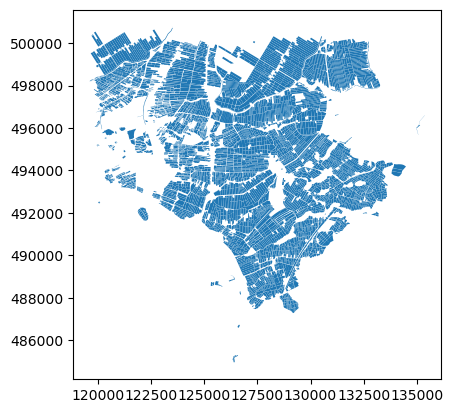

In [21]:
fields_cx.plot() #plot the fields

In [27]:
fields_cx.to_file("fields_cropped.shp")  #It is the shape file

In [28]:
#Cloud optimized vector formats or Geotiffs for faster performance

In [31]:
fields_cx.total_bounds

array([119594.384   , 484949.292625, 135375.77025 , 500782.531   ])

# New file, interchange projections

In [37]:
wells = gpd.read_file("../data/brogmwvolledigeset.zip")  #loading the new file

<Axes: >

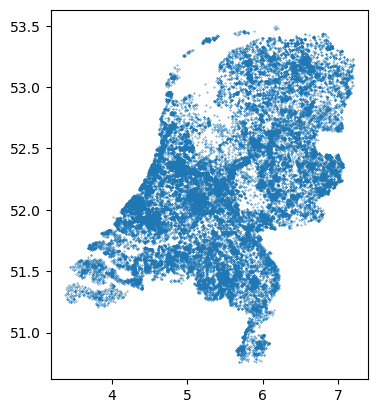

In [38]:
wells.plot(markersize=0.1) #plotting the wells

In [39]:
wells.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
#The projection is different between fields and wells so we change it
fields_epsg = fields_cx.crs.to_epsg()

In [43]:
wells = wells.to_crs(epsg=fields_epsg) #change the wells epsg to fields epsg

In [44]:
wells_clip = wells.clip(fields)  #Clip the wells to the fields region

<Axes: >

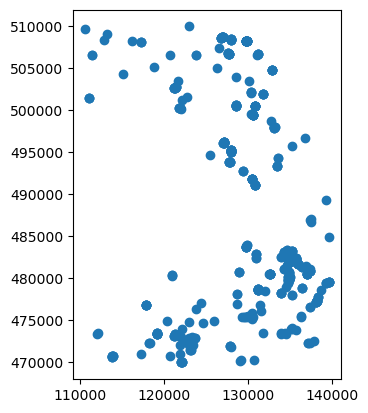

In [45]:
wells_clip.plot()